# 서울 주택가격_예측하기

####ALL RIGTHS ARE DESERVED BY HayeonKimm (11.30 완료)

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import os
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/국토교통부_표준주택가격_20210101.csv',encoding='cp949')
df.head()

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,용도지구,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,32.45,22.52,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,33.00,23.91,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,67.40,38.62,1,(2/0),제1종일반주거지역,자연경관지구,소로한면,부정형,연와조,1967,고급 주택지대,941000000
3,서울특별시,종로구,4,청운동 15-10,창의문로1길 20-5,대,단독주택,637.5,508.97,189.33,54.42,29.70,2,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,철근콘크리트조(RC조 RS조),1978,고급 주택지대,2775000000
4,서울특별시,종로구,5,청운동 15-26,창의문로1길 7,대,단독주택,62.8,33.06,33.06,52.64,52.64,1,(1/0),자연녹지지역,자연경관지구,세로(불),사다리형,시멘트블럭조,1963,기존 주택지대,99700000


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (50.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230000 entries, 0 to 229999
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   시도         229824 non-null  object 
 1   시군구        228852 non-null  object 
 2   일련번호       230000 non-null  int64  
 3   소재지        230000 non-null  object 
 4   도로명주소      230000 non-null  object 
 5   지목         230000 non-null  object 
 6   건물용도       230000 non-null  object 
 7   대지면적       230000 non-null  float64
 8   연면적        230000 non-null  float64
 9   건축면적       230000 non-null  float64
 10  용적률        230000 non-null  float64
 11  건폐율        230000 non-null  float64
 12  동수         230000 non-null  int64  
 13  층수(지상/지하)  230000 non-null  object 
 14  용도지역       230000 non-null  object 
 15  용도지구       54462 non-null   object 
 16  도로교통       230000 non-null  object 
 17  형상지세       230000 non-null  object 
 18  주건물구조      230000 non-null  object 
 19  사용승인일      230000 non-n

In [ ]:
df.describe()

,일련번호,대지면적,연면적,건축면적,용적률,건폐율,동수,사용승인일,주택공시가격
count,230000.000000,230000.000000,230000.000000,230000.000000,230000.000000,230000.000000,230000.000000,230000.000000,2.300000e+05
mean,568.864539,317.516874,163.637405,93.237947,66.032741,38.537052,1.405604,1987.603383,1.636653e+08
std,435.934022,255.253597,159.636428,42.396717,58.923122,18.617227,0.673850,19.015401,3.119330e+08
min,1.000000,7.900000,8.640000,1.000000,1.990000,0.640000,1.000000,1800.000000,1.620000e+06
25%,233.000000,158.500000,78.410000,66.540000,23.040000,21.500000,1.000000,1979.000000,3.650000e+07
50%,484.000000,251.000000,106.595000,86.310000,42.380000,38.240000,1.000000,1992.000000,7.850000e+07
75%,806.000000,424.000000,185.590000,108.900000,97.050000,54.200000,2.000000,2000.000000,1.820000e+08
max,2997.000000,20970.400000,9115.560000,2122.260000,646.000000,257.650000,9.000000,2020.000000,2.953000e+10


In [ ]:
import missingno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

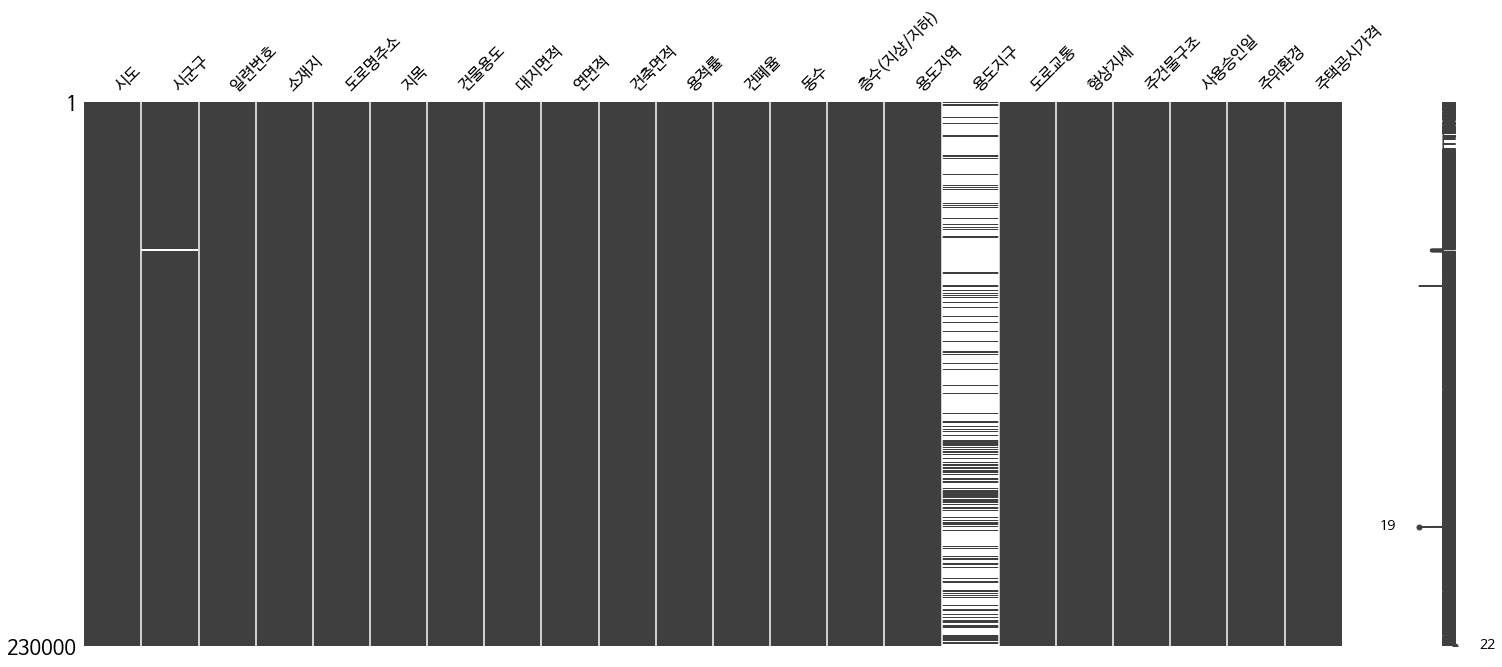

In [ ]:
missingno.matrix(df)

In [ ]:
df.isnull().sum()

시도              176
시군구            1148
일련번호              0
소재지               0
도로명주소             0
지목                0
건물용도              0
대지면적              0
연면적               0
건축면적              0
용적률               0
건폐율               0
동수                0
층수(지상/지하)         0
용도지역              0
용도지구         175538
도로교통              0
형상지세              0
주건물구조             0
사용승인일             0
주위환경              0
주택공시가격            0
dtype: int64

## 칼럼 확인

In [ ]:
df.columns

Index(['시도', '시군구', '일련번호', '소재지', '도로명주소', '지목', '건물용도', '대지면적', '연면적',
       '건축면적', '용적률', '건폐율', '동수', '층수(지상/지하)', '용도지역', '용도지구', '도로교통', '형상지세',
       '주건물구조', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

In [ ]:
# import seaborn as sns

# sns.pairplot(train_data[["MEDV", "RM", "AGE", "DIS", "PTRATIO"]]);

## 범주형 선별, 드랍

In [ ]:
df.drop(['도로명주소','일련번호','형상지세','주건물구조','지목','층수(지상/지하)'],axis=1,inplace=True)
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


In [ ]:
# df.isnull().sum()
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


In [ ]:
df.columns

Index(['시도', '시군구', '소재지', '건물용도', '대지면적', '연면적', '건축면적', '용적률', '건폐율', '동수',
       '용도지역', '용도지구', '도로교통', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

## 상관관계 확인

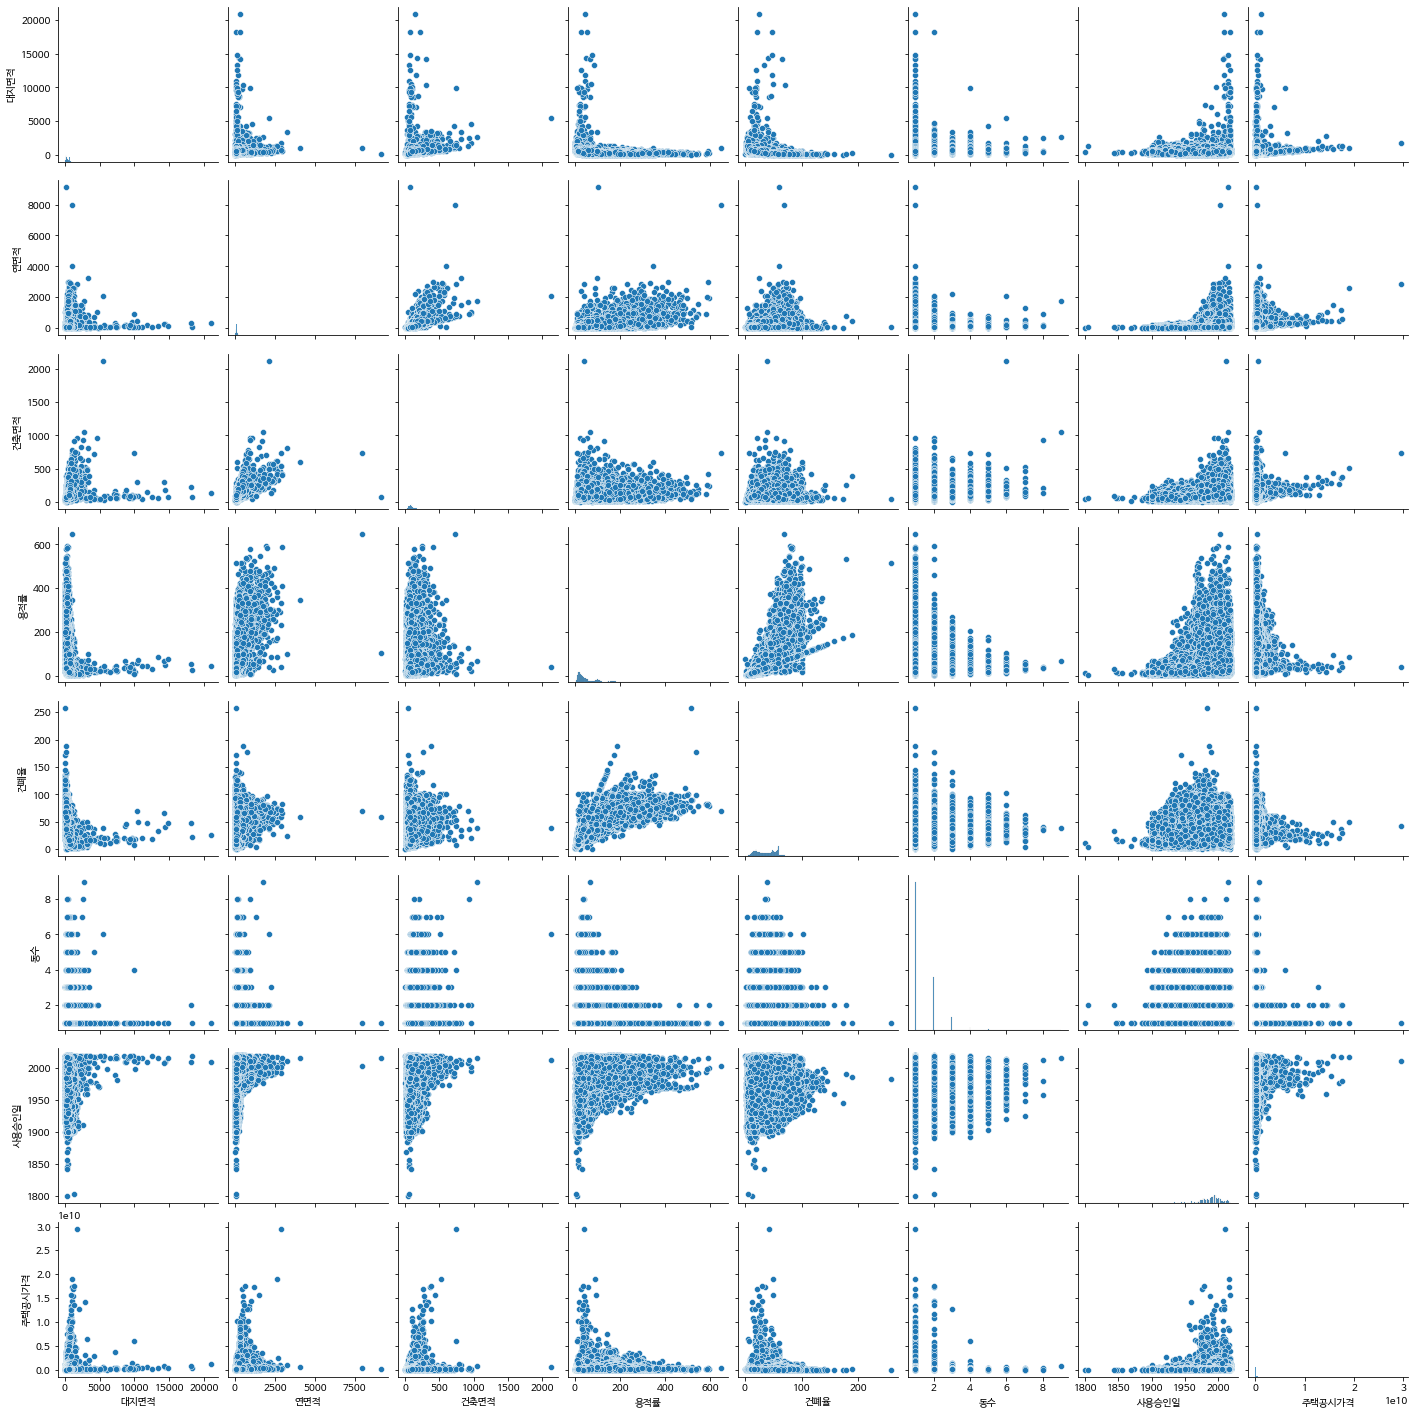

In [ ]:
import seaborn as sns

sns.pairplot(df[['시도', '시군구', '소재지', '건물용도', '대지면적', '연면적', '건축면적', '용적률', '건폐율', '동수',
       '용도지역', '용도지구', '도로교통', '사용승인일', '주위환경', '주택공시가격']])

In [ ]:
df_corr=df[['시도', '시군구', '소재지', '건물용도', '대지면적', '연면적', '건축면적', '용적률', '건폐율', '동수',
       '용도지역', '용도지구', '도로교통', '사용승인일', '주위환경', '주택공시가격']]

In [ ]:
df_corr.corr()

,대지면적,연면적,건축면적,용적률,건폐율,동수,사용승인일,주택공시가격
대지면적,1.000000,0.022001,0.374654,-0.397599,-0.598318,0.164416,0.115794,-0.015955
연면적,0.022001,1.000000,0.654392,0.703206,0.380485,-0.175806,0.328346,0.429018
건축면적,0.374654,0.654392,1.000000,0.197880,0.093618,0.149277,0.376043,0.234792
용적률,-0.397599,0.703206,0.197880,1.000000,0.791781,-0.283258,0.229436,0.302705
건폐율,-0.598318,0.380485,0.093618,0.791781,1.000000,-0.183658,0.124458,0.185266
동수,0.164416,-0.175806,0.149277,-0.283258,-0.183658,1.000000,-0.289545,-0.185831
사용승인일,0.115794,0.328346,0.376043,0.229436,0.124458,-0.289545,1.000000,0.157446
주택공시가격,-0.015955,0.429018,0.234792,0.302705,0.185266,-0.185831,0.157446,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


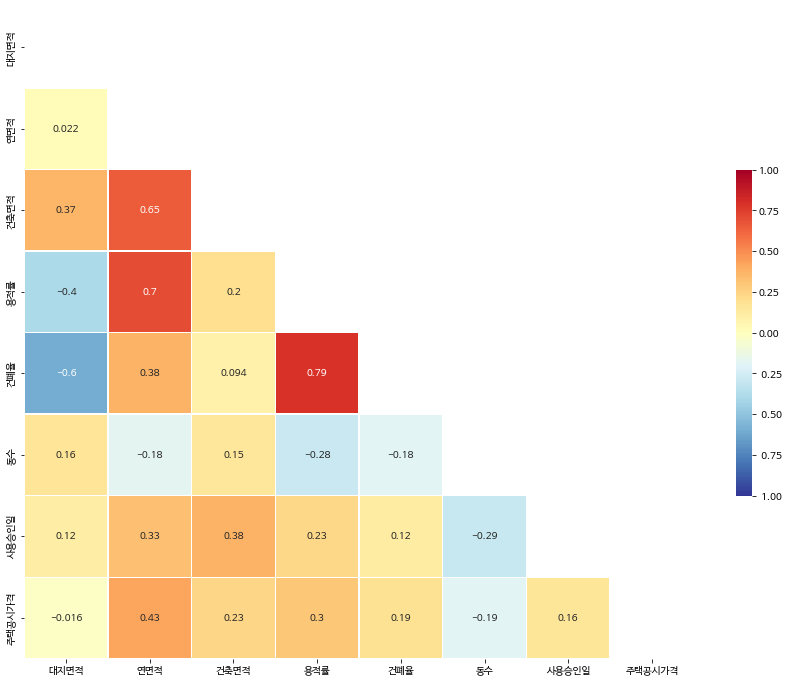

In [ ]:
import numpy as np
df__ = df_corr.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df__, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df__, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 서울 데이터 뽑아내기

In [ ]:
df['소재지']

0               청운동 4-18
1                청운동 8-3
2               청운동 12-9
3              청운동 15-10
4              청운동 15-26
               ...      
229995       표선면 토산리 540
229996     표선면 토산리 936-3
229997    표선면 토산리 1363-4
229998    표선면 토산리 1416-3
229999    표선면 토산리 1826-1
Name: 소재지, Length: 230000, dtype: object

In [ ]:
df=df[df['시도'] == '서울특별시']
df['시도'].value_counts()

서울특별시    22510
Name: 시도, dtype: int64

## 데이터 전처리

In [ ]:
df['소재지']=df['소재지'].str[:4]

In [ ]:
df.head()

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,자연경관지구,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,자연경관지구,소로한면,1967,고급 주택지대,941000000
3,서울특별시,종로구,청운동,단독주택,637.5,508.97,189.33,54.42,29.70,2,제1종일반주거지역,자연경관지구,세로(가),1978,고급 주택지대,2775000000
4,서울특별시,종로구,청운동,단독주택,62.8,33.06,33.06,52.64,52.64,1,자연녹지지역,자연경관지구,세로(불),1963,기존 주택지대,99700000


### 건축면적 , 연면적은 상관관계가 크다. 둘 중 하나만 쓰자.

### 용적률과 건폐율도 비슷하긴한데 , 우선 냅두자

In [ ]:
df=df.drop('연면적',1)

In [ ]:
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


## 시군구가 더 좋은 변수일지 소재지가 좋은 변수일지는 아직 모르겠다.
## 일단 시군구로 둔다. 소재지는 너무 카테고리 수가 많아서 오히려 과적합 가능성이 될거라 생각

In [ ]:
df.drop(columns=['소재지','시도'],inplace=True)
df.head(1)

,시군구,건물용도,대지면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,종로구,단독주택,1193.4,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


## 칼럼 정리

In [ ]:
 df=df[['시군구','건물용도','용도지역'	,'용도지구','주위환경',	'건축면적'	,'용적률'	,'건폐율'		,'사용승인일'	,'주택공시가격']]
df.head(1)

,시군구,건물용도,용도지역,용도지구,주위환경,건축면적,용적률,건폐율,사용승인일,주택공시가격
0,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,268.7,32.45,22.52,1994,4655000000


## 사용승인일 피쳐 확인 및 가공

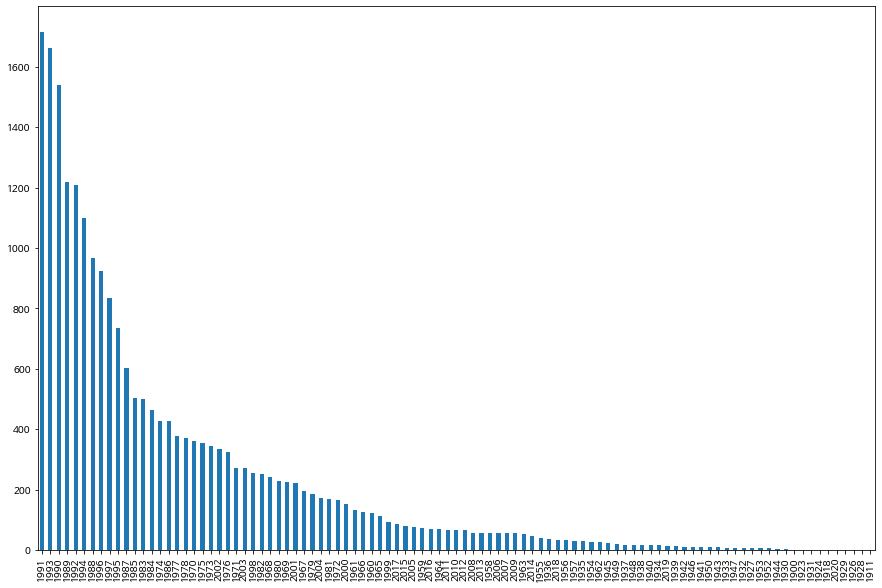

In [ ]:
plt.figure(figsize=(15,10))
df['사용승인일'].value_counts().plot.bar()

In [ ]:
df['사용승인일'] = np.where(df.사용승인일<1900,0,
                         np.where(df.사용승인일<1910,1,
                         np.where(df.사용승인일<1920,2,
                         np.where(df.사용승인일<1930,3,
                         np.where(df.사용승인일<1940,4,
                         np.where(df.사용승인일<1950,5,
                                  np.where(df.사용승인일<1960,6,
                                  np.where(df.사용승인일<1970,7,
                                  np.where(df.사용승인일<1980,8,
                                  np.where(df.사용승인일<1990,9,
                                  np.where(df.사용승인일<2000,10,
                                  np.where(df.사용승인일<2010,11,
                                  np.where(df.사용승인일<2020,12,13)))))))))))))

## 건축면적, 용적률 

### 이상치 검사

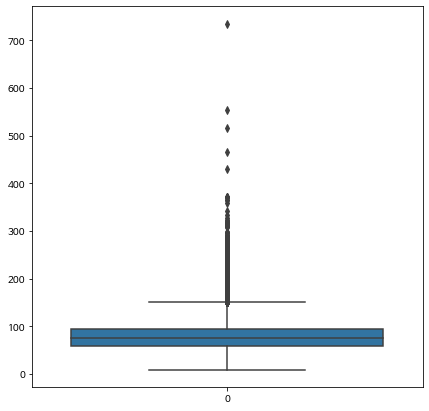

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df['건축면적'])

# 이상치 출력 함수

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
  
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

## 이상치 값 확인

서울 주택가격의 이상치 값은 보존해야 한다고 생각.-> 이상치 값까지 일반적 현상일수도 있다.

In [ ]:
outlier_iqr(df,'건축면적')

IQR은 36.75750000000001 이다.
lower bound 값은 2.863749999999989 이다.
upper bound 값은 149.89375 이다.
총 이상치 개수는 1066 이다.


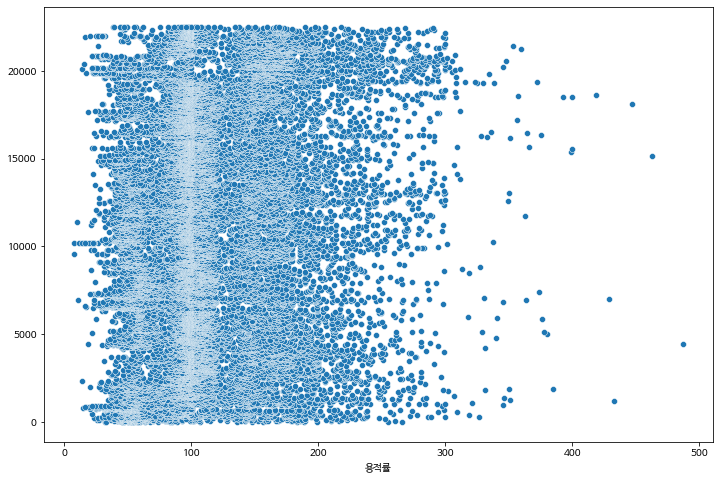

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='용적률',y=df.index)

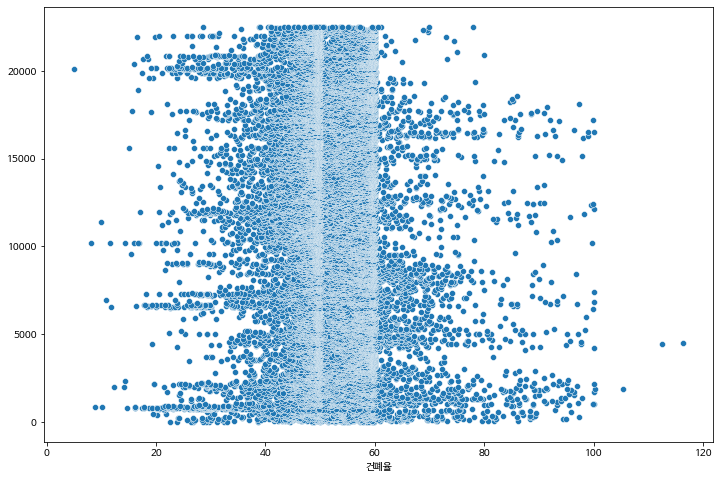

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='건폐율',y=df.index)

## 용적률 값 탐색

In [ ]:
count1=0
for i in df['용적률'] :
  
  if i >= 300:
    count1+=1

print(count1)

79


In [ ]:
count0=0
for i in df['용적률'] :
  
  if i <= 300:
    count0+=1

print(count0)

22432


In [ ]:
plt.figure(figsize=(10,7))
df['용적률'].value_counts().plot.bar()

In [ ]:
plt.figure(figsize=(10,7))
df['건폐율'].value_counts().plot.bar()

In [ ]:
# # import seaborn as sns

# sns.pairplot(df[[ '건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']])

In [ ]:
df.head(1)

,시군구,건물용도,용도지역,용도지구,주위환경,건축면적,용적률,건폐율,사용승인일,주택공시가격
0,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,268.7,32.45,22.52,10,4655000000


In [ ]:
df2=df.drop('용도지구',1)
df2=pd.get_dummies(df2, columns = ['시군구'	,'건물용도',	'용도지역','주위환경'	])

In [ ]:
df2.head(3)

,건축면적,용적률,건폐율,사용승인일,주택공시가격,시군구_강남구,시군구_강동구,시군구_강북구,시군구_강서구,시군구_관악구,시군구_광진구,시군구_구로구,시군구_금천구,시군구_노원구,시군구_도봉구,시군구_동대문구,시군구_동작구,시군구_마포구,시군구_서대문구,시군구_서초구,시군구_성동구,시군구_성북구,시군구_송파구,시군구_양천구,시군구_영등포구,시군구_용산구,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구,건물용도_기타복합용건물,건물용도_다가구주택,건물용도_다중주택,건물용도_단독주택,건물용도_주산용건물,건물용도_주상용건물,용도지역_개발제한구역,용도지역_근린상업지역,용도지역_일반상업지역,용도지역_자연녹지지역,...,주위환경_고밀도 상가지대,주위환경_고속도로주변 주택지대,주위환경_공동 주택지대,주위환경_공장 및 업무지대,주위환경_근교 농촌지대,주위환경_기존 공장지대,주위환경_기존 상가지대,주위환경_기존 주택지대,주위환경_노선 상가지대,주위환경_도심 상가지대,주위환경_도심 업무지대,주위환경_도심재개발 예정지대,주위환경_미개발지대,주위환경_미성숙 상가지대,주위환경_미성숙 주택지대,주위환경_번화한 상가지대,주위환경_상가 및 업무지대,주위환경_성숙중인 상가지대,주위환경_성숙중인 주택지대,주위환경_소규모 공장지대,주위환경_시가지주변 야산지대,주위환경_시장주변 상가지대,주위환경_시장지대,주위환경_신구옥 혼성지대,주위환경_신흥 주택지대,주위환경_아파트단지주변 상가지대,주위환경_아파트지대,주위환경_역주변 상가지대,주위환경_연립 주택지대,주위환경_일반 상가지대,주위환경_일반 주택지대,주위환경_전원 주택지대,주위환경_정비된 상가지대,주위환경_정비된 주택지대,주위환경_주택 및 상가혼용지대,주위환경_주택재개발 예정지대,주위환경_중심 상가지대,주위환경_지방도변 상가지대,주위환경_한옥지대,주위환경_후면 상가지대
0,268.70,32.45,22.52,10,4655000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,220.93,33.00,23.91,7,3134000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,91.54,67.40,38.62,7,941000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


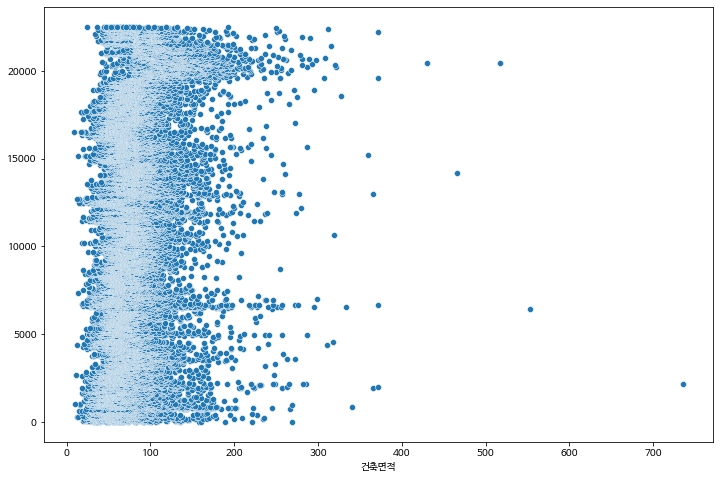

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2,x='건축면적',y=df.index)

In [ ]:
df2['건축면적'] = np.where(df2.건축면적<25,0,
                         np.where(df2.건축면적<50,1,
                         np.where(df2.건축면적<75,2,
                         np.where(df2.건축면적<100,3,
                         np.where(df2.건축면적<125,4,
                         np.where(df2.건축면적<150,5,
                                  np.where(df2.건축면적<175,6,
                                  np.where(df2.건축면적<200,7,
                                  np.where(df2.건축면적<225,8,
                                  np.where(df2.건축면적<250,9,
                                  np.where(df2.건축면적<275,10,
                                  np.where(df2.건축면적<300,11,12
                                  ))))))))))))


df2['용적률'] = np.where(df.용적률<30,0,
                         np.where(df2.용적률<60,1,
                         np.where(df2.용적률<90,2,
                         np.where(df2.용적률<120,3,
                         np.where(df2.용적률<150,4,
                         np.where(df2.용적률<180,5,
                                  np.where(df2.용적률<210,6,
                                  np.where(df2.용적률<240,7,
                                  np.where(df2.용적률<270,8,
                                  np.where(df2.용적률<300,9,10))))))))))

df2['건폐율'] = np.where(df2.건폐율<10,1,
                         np.where(df2.건폐율<20,2,
                         np.where(df2.건폐율<30,3,
                                  np.where(df2.건폐율<40,4,
                                           np.where(df2.건폐율<50,5,
                                                    np.where(df2.건폐율<60,6,
                                                             np.where(df2.건폐율<70,7,
                                                                      np.where(df2.건폐율<80,8,
                                                                               np.where(df2.건폐율<90,9,
                                                                                        np.where(df2.건폐율<100,10,11))))))))))
                                                                      

In [ ]:
df2.head(1)

,건축면적,용적률,건폐율,사용승인일,주택공시가격,시군구_강남구,시군구_강동구,시군구_강북구,시군구_강서구,시군구_관악구,시군구_광진구,시군구_구로구,시군구_금천구,시군구_노원구,시군구_도봉구,시군구_동대문구,시군구_동작구,시군구_마포구,시군구_서대문구,시군구_서초구,시군구_성동구,시군구_성북구,시군구_송파구,시군구_양천구,시군구_영등포구,시군구_용산구,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구,건물용도_기타복합용건물,건물용도_다가구주택,건물용도_다중주택,건물용도_단독주택,건물용도_주산용건물,건물용도_주상용건물,용도지역_개발제한구역,용도지역_근린상업지역,용도지역_일반상업지역,용도지역_자연녹지지역,...,주위환경_고밀도 상가지대,주위환경_고속도로주변 주택지대,주위환경_공동 주택지대,주위환경_공장 및 업무지대,주위환경_근교 농촌지대,주위환경_기존 공장지대,주위환경_기존 상가지대,주위환경_기존 주택지대,주위환경_노선 상가지대,주위환경_도심 상가지대,주위환경_도심 업무지대,주위환경_도심재개발 예정지대,주위환경_미개발지대,주위환경_미성숙 상가지대,주위환경_미성숙 주택지대,주위환경_번화한 상가지대,주위환경_상가 및 업무지대,주위환경_성숙중인 상가지대,주위환경_성숙중인 주택지대,주위환경_소규모 공장지대,주위환경_시가지주변 야산지대,주위환경_시장주변 상가지대,주위환경_시장지대,주위환경_신구옥 혼성지대,주위환경_신흥 주택지대,주위환경_아파트단지주변 상가지대,주위환경_아파트지대,주위환경_역주변 상가지대,주위환경_연립 주택지대,주위환경_일반 상가지대,주위환경_일반 주택지대,주위환경_전원 주택지대,주위환경_정비된 상가지대,주위환경_정비된 주택지대,주위환경_주택 및 상가혼용지대,주위환경_주택재개발 예정지대,주위환경_중심 상가지대,주위환경_지방도변 상가지대,주위환경_한옥지대,주위환경_후면 상가지대
0,10,1,3,10,4655000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 더미변수 생성

## split train , test

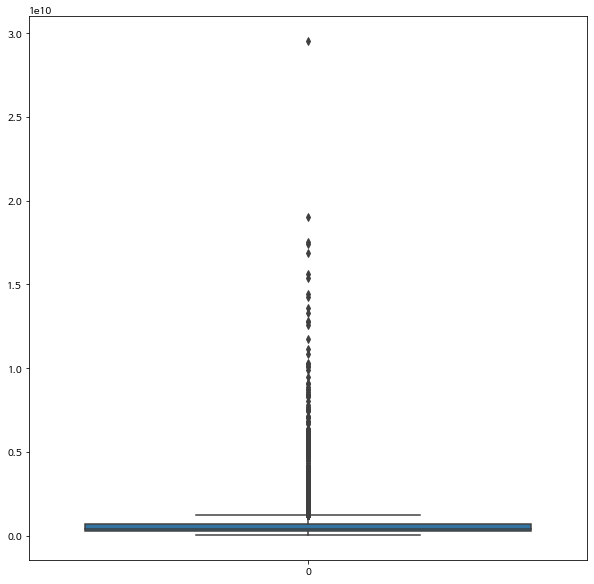

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2['주택공시가격'])

In [ ]:
df2['주택공시가격'].describe()

count    2.251000e+04
mean     6.170449e+08
std      7.578824e+08
min      3.160000e+07
25%      2.950000e+08
50%      4.160000e+08
75%      6.750000e+08
max      2.953000e+10
Name: 주택공시가격, dtype: float64

In [ ]:
df2['주택공시가격'].mean()

617044944.4691248

# target 값 피쳐 피쳐 엔지니어링

## target 값인 주택공시가격을 9개 급간(1억 단위)으로 나눈다.

In [ ]:
df2['주택공시가격'] = np.where(df2.주택공시가격<100000000,1,
                          np.where(df2.주택공시가격<200000000,2,
                                    np.where(df2.주택공시가격<300000000,3,
                                              np.where(df2.주택공시가격<400000000,4,
                                                        np.where(df2.주택공시가격<500000000,5,
                                                                  np.where(df2.주택공시가격<600000000,6,
                                                                            np.where(df2.주택공시가격<700000000,7,
                                                                                      np.where(df2.주택공시가격<800000000,8,9)))))))) # 8억이상은 9로 치환
                                                                                                
                         
                        #  np.where(df2.주택공시가격<1910,'1',
                        #  np.where(df2.주택공시가격<1920,'2',
                        #  np.where(df2.주택공시가격<1930,'3',
                        #  np.where(df2.주택공시가격<1940,'4',
                        #  np.where(df2.주택공시가격<1950,'5',
                        #           np.where(df2.주택공시가격<1960,'6',
                        #           np.where(df2.주택공시가격<1970,'7',
                        #           np.where(df2.주택공시가격<1980,'8',
                        #           np.where(df2.주택공시가격<1990,'9',
                        #           np.where(df2.주택공시가격<2000,'10',
                        #           np.where(df2.주택공시가격<2010,'11',
                        #           np.where(df2.주택공시가격<2020,'12','13')))))))))))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = df2.drop(columns='주택공시가격')
y = df2['주택공시가격']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [ ]:
print(x_train.shape,
x_test.shape)

(15757, 87) (6753, 87)


In [ ]:
df2.주택공시가격.value_counts(ascending=False)

4    4702
3    4200
9    4180
5    2928
6    2087
7    1637
2    1536
8    1115
1     125
Name: 주택공시가격, dtype: int64

# TRAIN

# Random Forest Regressor 

In [114]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
# rf_pred=rf.predict(x_test)

mse = mean_squared_error(y_test, rf.predict(x_test))
print('{:.4f}'.format(mse))

1.4801


In [ ]:
# feature_importance = rf.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure(figsize=(20,10))
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(X.columns)[sorted_idx])
# plt.title('Feature Importance (MDI)')
# plt.show()

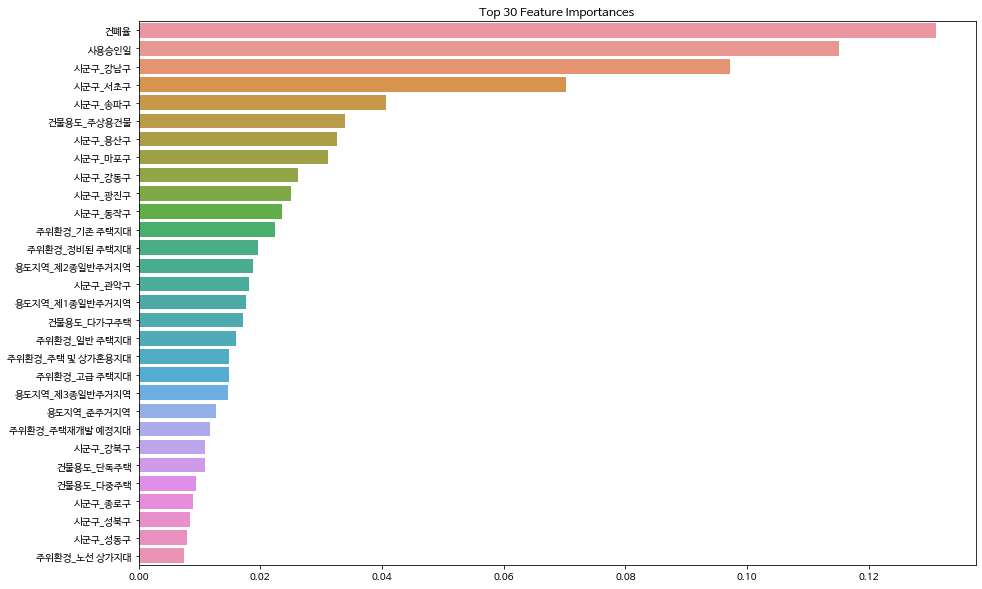

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(15,10))
plt.title('Top 30 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 최적의 파라미터 찾기

In [135]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [1,3,10,20],
    'min_samples_leaf':[1,3,10,20],
    'min_samples_split':[1,3,10,20,],
    'random_state':[0]}


# regr = RandomForestRegressor(random_state=0)

# clf = GridSearchCV(regr, parameters)
# clf.fit(x_train, y_train)

# y_pred = clf.predict(X_test)
# mean_squared_error(y_test, y_pred)

from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Hyperparameter 조합 정의
# param_grid = {'n_estimators': [100, 200, 300],
#   'max_depth': [2, 3, 4, 5],
#    'min_samples_leaf': [1, 20, 100],
#   'learning_rate': [0.01, 0.02, 0.05],
#   'loss': 'ls'} 
# grid search 모델 정의, 학습 및 model selection

grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                   param_grid=param_grid, 
                   cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
# reg = ensemble.GradientBoostingRegressor(**grid_search.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300, 'random_state': 0}


In [137]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV




params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_leaf':1,
    'min_samples_split':20 ,
    'random_state':0}


hist = RandomForestRegressor()
hist.set_params(**params)
         
hist.fit(x_train, y_train)

mse = mean_squared_error(y_test, hist.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.4326


# 종료

----------------------

#  일어났던 문제들

## 오류찾기

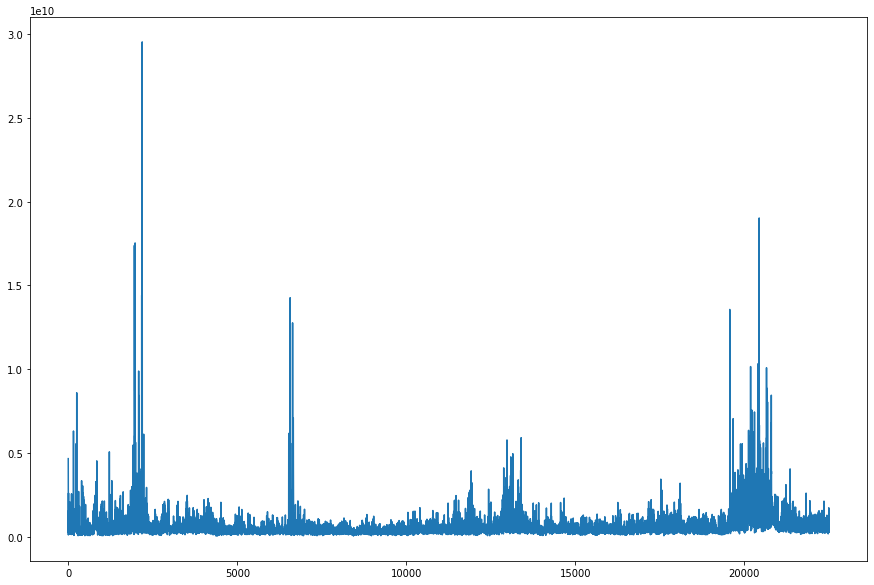

In [ ]:
df.head(1)
plt.figure(figsize=(15,10))
df['주택공시가격'].plot.line()

## 값이 너무 제각각이다. 정규화가 필요하다 생각.

## 이상치도 제거필요.. 가격이 너무 높은 주택들이 있을 것 같다.

## 오류값이 매우 크다

In [ ]:
params = {'max_iter': 200, # 트리의 개수
          'max_depth': 4,
           'min_samples_leaf': 1,
          'learning_rate': 0.02,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음


hist = ensemble.HistGradientBoostingRegressor(**params)
hist.fit(x_train, y_train)

mse = mean_squared_error(y_test, hist.predict(x_test))
print('{:.4f}'.format(mse))

107258468579512560.0000


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
params = {'max_iter': 100, # 트리의 개수
          'max_depth': 5,
           'min_samples_leaf': 1,
          'learning_rate': 0.05,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음




xgb = XGBRegressor(**params)
xgb.fit(train_x, train_y)


y_preds = xgb.predict(test_x)
mse = mean_squared_error(test_y, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(test_y, y_preds)))



# mse = mean_squared_error(y_test, hist.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, hist.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

[08:19:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 78116467036234592.000 , RMSE : 279493232.541
Variance score : 0.839


In [ ]:
# xgb=XGBRegressor()
# xgb.fit(train_x,train_y)
# pred=xgb.predict(test_x)

[07:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# from sklearn.metrics import make_scorer

# def rmsle(predicted_values, actual_values):
#     # 넘파이로 배열 형태로 바꿔준다.
#     predicted_values = np.array(predicted_values)
#     actual_values = np.array(actual_values)
    
#     # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
#     # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
#     log_predict = np.log(predicted_values + 1)
#     log_actual = np.log(actual_values + 1)
    
#     # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
#     difference = log_predict - log_actual
#     # difference = (log_predict - log_actual) ** 2
#     difference = np.square(difference)
    
#     # 평균을 낸다.
#     mean_difference = difference.mean()
    
#     # 다시 루트를 씌운다.
#     score = np.sqrt(mean_difference)
    
#     return score

# rmsle_scorer = make_scorer(rmsle)
# rmsle_scorer